# 3D Vision Homework 1
>王子轩 2023011307
`wang-zx23@mails.tsinghua.edu.cn`
## Probelem 1
### Subproblem 1.1
The map $\textit{f}: \mathbb{R}^n \rightarrow \mathbb{R}^3$ is defined by 
$$
f(u, v) = \begin{bmatrix}
a \cos u \sin v  & \\
b \sin u  \sin v  & \\
c \cos v &  
\end{bmatrix}
\text{where} - \pi \leq u \leq  \pi, \quad 0 \leq v \leq \pi
$$
The function $f$ maps the 2D domain to an ellipsoid.
Let $a = 1$, $b = 1$, $c = \frac{1}{2}$. Let $\mathbf{p} = (u, v)$ be a point in the domain of $f$, and let
$\gamma: (-1, 1) \rightarrow \mathbb{R}^2$ be a curve with $\gamma(0) = \mathbf{p}$ and $\gamma'(t) = \mathbf{v}$.
Now we let $\mathbf{p} = (\frac{\pi}{4}, \frac{\pi}{6})$ and $\mathbf{v} = (1, 0)$, we draw the curve $f(\gamma(t))$.

### Solution:
From $\gamma'(t) = (1, 0)\text{ and } \gamma(0) = (\frac{\pi}{4}, \frac{\pi}{6}) $ we get $\gamma(t) = (\frac{\pi}{4} + t, \frac{\pi}{6}) $, thus $$f(\gamma(t)) = \begin{bmatrix}
\cos(\frac{\pi}{4} + t) \sin(\frac{\pi}{6}) \\
\sin(\frac{\pi}{4} + t) \sin(\frac{\pi}{6}) \\
\frac{1}{2} \cos(\frac{\pi}{6})
\end{bmatrix} $$
>Full code using object oriented programming in Python is in src/draw.py 

In [4]:

! python src/draw.py

Traceback (most recent call last):
  File "e:\project\3DV\PAs\PA1\src\draw.py", line 446, in <module>
    ParameterLoader.save_to_file(default_params, config_file)
  File "e:\project\3DV\PAs\PA1\src\draw.py", line 60, in save_to_file
    with open(file_path, 'w') as f:
FileNotFoundError: [Errno 2] No such file or directory: 'e:\\project\\3DV\\PAs\\Homework 1\\ellipsoid_config.json'


>Simpler view of the code is list as follows, and the result can be seen in the image.

![draw ellipsoid and curve](assets/image-20250317220956088.png)

In [5]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
a, b, c = 1, 1, 0.5
p = (np.pi/4, np.pi/6)
v = (1, 0)
vis = o3d.visualization.Visualizer()
vis.create_window(window_name="Ellipsoid with Curve")
u = np.linspace(-np.pi, np.pi, 50)
v = np.linspace(0, np.pi, 25)
u_grid, v_grid = np.meshgrid(u, v)
x = a * np.cos(u_grid) * np.sin(v_grid)
y = b * np.sin(u_grid) * np.sin(v_grid)
z = c * np.cos(v_grid)
vertices = []
for i in range(len(v)):
    for j in range(len(u)):
        vertices.append([x[i, j], y[i, j], z[i, j]])
vertices = np.array(vertices)

triangles = []
for i in range(len(v)-1):
    for j in range(len(u)-1):
        idx1 = i * len(u) + j
        idx2 = i * len(u) + (j + 1)
        idx3 = (i + 1) * len(u) + j
        idx4 = (i + 1) * len(u) + (j + 1)
        triangles.append([idx1, idx2, idx3])
        triangles.append([idx2, idx4, idx3])
triangles = np.array(triangles)

mesh = o3d.geometry.TriangleMesh()
mesh.vertices = o3d.utility.Vector3dVector(vertices)
mesh.triangles = o3d.utility.Vector3iVector(triangles)
mesh.compute_vertex_normals()
mesh.paint_uniform_color([0.8, 0.8, 0.8]) 

mesh_wireframe = o3d.geometry.LineSet.create_from_triangle_mesh(mesh)
mesh_wireframe.paint_uniform_color([0.5, 0.5, 0.5])  

t_values = np.linspace(-1, 1, 100)
curve_points = []

for t in t_values:
    u_t = np.pi/4 + t
    v_t = np.pi/6
    x_t = a * np.cos(u_t) * np.sin(v_t)
    y_t = b * np.sin(u_t) * np.sin(v_t)
    z_t = c * np.cos(v_t)
    
    curve_points.append([x_t, y_t, z_t])

curve_points = np.array(curve_points)

line_indices = [[i, i+1] for i in range(len(curve_points)-1)]
line_set = o3d.geometry.LineSet()
line_set.points = o3d.utility.Vector3dVector(curve_points)
line_set.lines = o3d.utility.Vector2iVector(line_indices)
line_set.colors = o3d.utility.Vector3dVector([[1, 0, 0] for _ in range(len(line_indices))])  # Red color

coordinate_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.5, origin=[0, 0, 0])

vis.add_geometry(mesh)
vis.add_geometry(mesh_wireframe)  
vis.add_geometry(line_set)
vis.add_geometry(coordinate_frame)  

opt = vis.get_render_option()
opt.background_color = np.array([1, 1, 1])  
opt.point_size = 5.0
opt.mesh_show_wireframe = True  

vis.run()
vis.destroy_window()

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(curve_points)
pcd.paint_uniform_color([0, 1, 0]) 

sample_points = mesh.sample_points_uniformly(number_of_points=3000)
sample_points.paint_uniform_color([0, 0, 0.8])  

o3d.visualization.draw_geometries([mesh, mesh_wireframe, pcd, coordinate_frame, sample_points], 
                                 window_name="Ellipsoid with Curve Points",
                                 mesh_show_wireframe=True)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


### Subproblem 1.2
Differential map: The differential of a function f at a point p is a linear
map. Equivalent to how we define the differential in class, we can also
define by the gradient of the curve w.r.t. the curve parameter: $Df_{\mathbf{p}(v)} =
f(γ(t))′|t=0.$
### Solution:
#### (a) $Df_{\mathbf{p}(v)}$'s expression:
$Df_{\mathbf{p}(v)} = f(γ(t))′|t=0 = ( f \circ \gamma)'(t)  = f'(\gamma(t)) \gamma'(t) |t=0 = (\frac{\partial f}{\partial \mathbf{p}}) \mathbf{v} = \nabla f \mathbf{v}  
=  (\frac{\partial f}{\partial u}, \frac{\partial f}{\partial v}) \mathbf{v}$ 
thus
$$ 
Df_{\mathbf{p}} 
= 
\begin{bmatrix}
\frac{\partial f}{\partial u} & \frac{\partial f}{\partial v}
\end{bmatrix}
= \begin{bmatrix}
-a\sin u \sin v & a\cos u \cos v \\
b\cos u \sin v & b\sin u \cos v \\
0 & -c\sin v
\end{bmatrix}
= 
\begin{bmatrix}
-\sin u \sin v & \cos u \cos v \\
\cos u \sin v & \sin u \cos v \\
0 & -\frac{1}{2}\sin v
\end{bmatrix}
$$
#### (b) Describe the geometry meaning of the differential map
The differential map $Df_{\mathbf{p}}$ is a linear map that provides the linear approximation of $f$ near point $\mathbf{p}$. It maps 2D tangent space from the input space to the 3D tangent output space, showing how local directions change under the differential map. For example if a point moves at $\mathcal{p}$ by  the velocity of $\mathcal{v}$ in the input space, $Df_{\mathbf{p}}(v)$ represents the velocity of its image point $f_p$ at that in the output space.
#### (c) Draw $\mathcal{Df_p(v)}$ on the ellipsoid
$\mathbf{p}=( \frac{π}{4}, \frac{π}{6}) and \mathbf{v} = (1, 0)$ and we konw that 
$Df_{\mathbf{p}} =
\begin{bmatrix}
-\sin u \sin v & \cos u \cos v \\
\cos u \sin v & \sin u \cos v \\
0 & -\frac{1}{2}\sin v
\end{bmatrix}$ Thus 
$$
Df_{\mathbf{p}} \mathbf{v} 
= \begin{bmatrix}
-\sin u \sin v & \cos u \cos v \\
\cos u \sin v & \sin u \cos v \\
0 & -\frac{1}{2}\sin v
\end{bmatrix}
\begin{bmatrix}
1 \\
0
\end{bmatrix}
= 
\begin{bmatrix}
-\sin u \sin v \\
\cos u \sin v \\
0
\end{bmatrix}
$$
The implemention of full code is in `src/draw.py`, and the class `DifferentialMap` is used to draw the $D_f(v)$ in both directions of the tangent plane.
Run `! python draw.py` you can see the result that the $D_f(v)$ is drawn in both directions of the tangent plane. The Red arrow is the direction of $\mathbf{v} = (1,0)$ and the Blue arrow is the direction of $\mathbf{v} = (0, 1)$.  In the following image, the Red arrow is the direction of $\mathbf{v} = (1,0)$ and the Blue arrow is the direction of $\mathbf{v} = (0, 1)$. See the first image(a):
a
![a](assets\image-20250318001837911.png)

c![c](assets\image-20250318002530291.png)

>Implementation code for the $\mathcal{Df_p}$

```python
class DifferentialMap:
    def __init__(self, ellipsoid, u, v):
        self.ellipsoid = ellipsoid
        self.u = u
        self.v = v
        
    def compute_dfp(self):
        """Calculate Df_p @ (u,v)"""
        a, b, c = self.ellipsoid.a, self.ellipsoid.b, self.ellipsoid.c
        u, v = self.u, self.v
        dfp = np.array([
            [-a * np.sin(u) * np.sin(v), a * np.cos(u) * np.cos(v)],
            [b * np.cos(u) * np.sin(v), b * np.sin(u) * np.cos(v)],
            [0, -c * np.sin(v)]
        ])
        return dfp
    
    def apply_dfp_to_vector(self, v_direction):
        """Apply Df_p to a specific direction vector v"""
        dfp = self.compute_dfp()
        v_direction = np.array(v_direction)
        v_direction = v_direction / np.linalg.norm(v_direction)
        result = dfp @ v_direction
        return result
    
    def create_differential_vector(self, v_direction, scale=0.2, color=[1, 0, 0]):
        """Create a visualization of Df_p(v) for a specific direction v"""
        x = self.ellipsoid.a * np.cos(self.u) * np.sin(self.v)
        y = self.ellipsoid.b * np.sin(self.u) * np.sin(self.v)
        z = self.ellipsoid.c * np.cos(self.v)
        base_point = np.array([x, y, z])
        direction = self.apply_dfp_to_vector(v_direction)
        direction = direction / np.linalg.norm(direction) * scale
        cylinder = o3d.geometry.TriangleMesh.create_cylinder(
            radius=0.01,
            height=np.linalg.norm(direction)
        )
        cone = o3d.geometry.TriangleMesh.create_cone(
            radius=0.02,
            height=0.05
        )
        z_axis = np.array([0, 0, 1])
        if not np.allclose(direction, z_axis) and not np.allclose(direction, -z_axis):
            rotation_axis = np.cross(z_axis, direction)
            rotation_axis = rotation_axis / np.linalg.norm(rotation_axis)
            angle = np.arccos(np.dot(z_axis, direction/np.linalg.norm(direction)))
            R = o3d.geometry.get_rotation_matrix_from_axis_angle(rotation_axis * angle)
            cylinder.rotate(R, center=[0, 0, 0])
            cone.rotate(R, center=[0, 0, 0])
        cylinder.translate(base_point + direction/2)
        cone.translate(base_point + direction)
        cylinder.paint_uniform_color(color)
        cone.paint_uniform_color(color)
        return [cylinder, cone]
    
    def create_differential_vectors(self, scale=0.2, directions=None):
        """Create visualizations for multiple direction vectors"""
        if directions is None:
            # Default: standard basis vectors
            directions = [
                ([1, 0], [1, 0, 0]),  # u direction, red color
                ([0, 1], [0, 0, 1])   # v direction, blue color
            ]
        arrows = []
        for v_dir, color in directions:
            arrow_parts = self.create_differential_vector(v_dir, scale, color)
            arrows.extend(arrow_parts)
        
        return arrows
```

In [6]:
! python src/draw.py

Traceback (most recent call last):
  File "e:\project\3DV\PAs\PA1\src\draw.py", line 446, in <module>
    ParameterLoader.save_to_file(default_params, config_file)
  File "e:\project\3DV\PAs\PA1\src\draw.py", line 60, in save_to_file
    with open(file_path, 'w') as f:
FileNotFoundError: [Errno 2] No such file or directory: 'e:\\project\\3DV\\PAs\\Homework 1\\ellipsoid_config.json'


#### (d) Calculate the normal vector of tagent plane at point $p$.
$$
N(u, v) = \frac{f_u \times f_v}{\| f_u \times f_v \|}\\
 \text{where} f_u = \frac{\partial f}{\partial u} \quad  f_v = \frac{\partial f}{\partial v}
$$
From 
$$
\mathbf{p} = (\frac{\pi}{4},\frac{\pi}{6}), \quad f_u 
= \begin{bmatrix}
-\sin u \sin v\\
\cos u \sin v  \\
0
\end{bmatrix}
f_v = \begin{bmatrix}
\cos u \cos v \\
\sin u \cos v \\
-\frac{1}{2} \sin v
\end{bmatrix}
$$ 
we have 
$f_u \times f_v = \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
-\sin u \sin v & \cos u \sin v & 0 \\
\cos u \cos v & \sin u \cos v & -\frac{1}{2} \sin v
\end{vmatrix}$

$= \begin{bmatrix}
-\frac{1}{2}\cos u \sin^2 v \
-\frac{1}{2}\sin u \sin^2 v \
-\sin v \cos v
\end{bmatrix}$

$u = \frac{\pi}{4}, v = \frac{\pi}{6}$：

$f_u \times f_v = \begin{bmatrix}
-\frac{1}{2}\frac{\sqrt{2}}{2} \cdot (\frac{1}{2})^2 \
-\frac{1}{2}\frac{\sqrt{2}}{2} \cdot (\frac{1}{2})^2 \
-\frac{1}{2} \cdot \frac{\sqrt{3}}{2}
\end{bmatrix} = \begin{bmatrix}
-\frac{\sqrt{2}}{16} \
-\frac{\sqrt{2}}{16} \
-\frac{\sqrt{3}}{4}
\end{bmatrix}$
$|f_u \times f_v| = \sqrt{(\frac{\sqrt{2}}{16})^2 + (\frac{\sqrt{2}}{16})^2 + (\frac{\sqrt{3}}{4})^2}$
$= \sqrt{\frac{1}{128} + \frac{1}{128} + \frac{3}{16}}$
$= \sqrt{\frac{1}{64} + \frac{12}{64}}$
$= \sqrt{\frac{13}{64}} = \frac{\sqrt{13}}{8}$

However, we need to orient the closed surface outward.
Thus


$N_{(\frac{\pi}{4},\frac{\pi}{6})} = \begin{bmatrix}
\frac{\sqrt{2}}{16} \\
\frac{\sqrt{2}}{16} \\
\frac{\sqrt{3}}{4}
\end{bmatrix} \cdot \frac{8}{\sqrt{13}} = \begin{bmatrix}
\frac{\sqrt{2}}{2\sqrt{13}} \\
\frac{\sqrt{2}}{2\sqrt{13}} \\
\frac{2\sqrt{3}}{\sqrt{13}}
\end{bmatrix}
= [0.19611162,0.19611162, 0.96076892]^T$
How
#### (e) Give a group of orthonormal bases of the tangent space at $f(p)$ and draw it.
Actually, at (c) I have got the orthonormal bases of the tangent space at $f(p)$, that is $\mathcal{D_f((0, 1))}$ and $\mathcal{D_f((1, 0))}$.

b![b](assets\image-20250318000822800.png)



### Subproblem 1.3
Given $ p = \left( \frac{\pi}{4}, \frac{\pi}{6} \right) $ and $ v = (1, 0) $. For simplicity, let $ g_v(t) = f(\gamma(t)) $ denote the curve which passes through $ p $ at $ t = 0 $.
### Solution
#### (a) What is the arc length $ s(t) $ as the point moves from $ g_v(0) $ to $ g_v(t) $?

$$
s(t) = \int_0^t \|g_v'(t)\| dt = \int_0^t \|f'(\gamma(t))\| \nabla \gamma(t) dt = \int_0^t \|f'(\gamma(t))\| \mathbf{v} dt\\
= \int_0^t \|[-\sin u \sin v, \cos u \sin v, 0]^T\| dt
= \int_0^t |\sin v\| dt
= \frac{1}{2} t\\
$$
#### (b) Give the arc-length parametrization $ h_v(s) $ of the curve.
$$
h_v(s) = g_v(t(s)) = g_v(2s) = f(\gamma(2s)) = \\
[\frac{1}{2}\cos (\frac{\pi}{4} + 2s), \frac{1}{2}\sin (\frac{\pi}{4} + 2s), \frac{\sqrt{3}}{4}]^T
$$
#### (c) What is the normal vector of the curve at a point $ h_v(s) $? Hint: Use $ h_v(s) $ to derive the normal.
By the relation of normal of tangent vector of a curve $N(s) = \frac{T'(s)}{\|T'(s)\|}$, we can derive that:
$$
T(s) = h_v'(s) = [-\sin (\frac{\pi}{4} + 2s) \cos (\frac{\pi}{4} + 2s), 0]^T\\
T'(s) = [-2 \cos (\frac{\pi}{4} + 2s), -2\sin (\frac{\pi}{4} + 2s), 0]^T\\
N(s) = \frac{T'(s)}{\|T'(s)\|} = [- \cos (\frac{\pi}{4}+ 2s), - \sin( \frac{\pi}{4}+ 2s), 0 ]^T
$$

### Subproblem 1.4
Curvature: In 2(d), you have computed the normal at **p**. Denote this normal as $N_p$.
### Solution

#### (a) Compute the differential of the normal $DN_p$, and express it as a matrix. 
From 
$$
N_p =
\begin{bmatrix}
\frac{1}{2}\cos u \sin^2 v \\
\frac{1}{2}\sin u \sin^2 v \\
\sin v \cos v
\end{bmatrix}
$$
By normalization:
$$
\hat N_p =
\frac{N_p}{\|N_p\|} =
\frac{-1}{\sqrt{\sin^2 v + 4\cos^2 v}} 
\begin{bmatrix}
\cos u \sin v\\
\sin u \sin v\\
2 \cos v
\end{bmatrix} \\
DN_p =  - [\frac{\partial \hat N_p}{\partial u}, \frac{\partial \hat N_p}{\partial v}]
=
- \begin{bmatrix}
\frac{\sin(u)\sin(v)}{\sqrt{\sin^2(v) + 4\cos^2(v)}} & -\frac{4\cos(u)\cos(v)}{(\sin^2(v) + 4\cos^2(v))^{3/2}},
 \\
-\frac{\cos(u)\sin(v)}{\sqrt{\sin^2(v) + 4\cos^2(v)}} & -\frac{4\sin(u)\cos(v)}{(\sin^2(v) + 4\cos^2(v))^{3/2}},
\\
0 & \frac{2\sin(v)}{(\sin^2(v) + 4\cos^2(v))^{3/2}}
\end{bmatrix} \in \mathbb{R}^{3 \times 2}
$$


#### (b) Find the eigenvectors of the shape operator at **p**.

From 
$$
Df_{\mathbf{p}} 
= 
\begin{bmatrix}
\frac{\partial f}{\partial u} & \frac{\partial f}{\partial v}
\end{bmatrix}
= \begin{bmatrix}
-a\sin u \sin v & a\cos u \cos v \\
b\cos u \sin v & b\sin u \cos v \\
0 & -c\sin v
\end{bmatrix}
= 
\begin{bmatrix}
-\sin u \sin v & \cos u \cos v \\
\cos u \sin v & \sin u \cos v \\
0 & -\frac{1}{2}\sin v
\end{bmatrix}
$$
And from the definition of the shape operator: 
$$
DN_{\mathbf{p}} = Df_{\mathbf{p}} S
$$
As the matrix $ Df_{\mathbf{p}} $ is not a square matrix, we use the pseudo-inverse of $Df_{\mathbf{p}}$:
$S = (Df_{\mathbf{p}}^T Df_{\mathbf{p}})^{-1} Df_{\mathbf{p}}^T DN_{\mathbf{p}}$
$$
Df_{\mathbf{p}}^T =
\begin{bmatrix}
-\sin u \sin v & \cos u \sin v & 0 \\
\cos u \cos v & \sin u \cos v & -\frac{1}{2}\sin v
\end{bmatrix}\\
Df_{\mathbf{p}}^T Df_{\mathbf{p}} =
\begin{bmatrix}
\sin^2 v & 0 \\
0 & \cos^2 v + \frac{1}{4}\sin^2 v
\end{bmatrix}\\
(Df_{\mathbf{p}}^T Df_{\mathbf{p}})^{-1} =
\begin{bmatrix}
\frac{1}{\sin^2 v} & 0 \\
0 & \frac{1}{\cos^2 v + \frac{1}{4}\sin^2 v}
\end{bmatrix}\\
S = (Df_{\mathbf{p}}^T Df_{\mathbf{p}})^{-1} Df_{\mathbf{p}}^T DN_{\mathbf{p}}
$$
$$
S = (Df_{\mathbf{p}}^T Df_{\mathbf{p}})^{-1} Df_{\mathbf{p}}^T DN_{\mathbf{p}} = 
\begin{bmatrix}
\frac{1}{\sqrt{\sin^2 v + 4\cos^2 v}} & 0 \\
0 & \frac{4}{(\sin^2 v + 4\cos^2 v)^{3/2}}
\end{bmatrix}
$$
We can derive that $S$ is diagonal, and its eigenvectors are $[0, 1]^T, [1, 0]$, which means the principal curvature directions are $[0, 1]^T, [1, 0]$.

#### (c) [Programming Assignment] Draw the two principal curvature directions in the tangent plane of the ellipsoid **p**
Actually I have done this in the previous question, and the result is shown in the figure below:
b![b](assets\image-20250318000822800.png) but you can also run the following code to get the result:

In [7]:
import numpy as np
import open3d as o3d
from src.draw import Ellipsoid, DifferentialMap

def draw_principal_curvature_directions():
    ellipsoid = Ellipsoid(a=1, b=1, c=0.5)
    mesh = ellipsoid.generate_surface()
    mesh.paint_uniform_color([0.8, 0.8, 0.8])
    wireframe = ellipsoid.get_wireframe()
    wireframe.paint_uniform_color([0.5, 0.5, 0.5])
    u, v = np.pi/4, np.pi/6
    x = ellipsoid.a * np.cos(u) * np.sin(v)
    y = ellipsoid.b * np.sin(u) * np.sin(v)
    z = ellipsoid.c * np.cos(v)
    point = np.array([x, y, z])
    point_cloud = o3d.geometry.PointCloud()
    point_cloud.points = o3d.utility.Vector3dVector([point])
    point_cloud.paint_uniform_color([1, 0, 0]) 
    diff_map = DifferentialMap(ellipsoid, u, v)
    principal_directions = [
        ([1, 0], [1, 0, 0]),  
        ([0, 1], [0, 0, 1])   
    ]
    arrows = diff_map.create_differential_vectors(scale=0.3, directions=principal_directions)
    coordinate_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.5, origin=[0, 0, 0])
    vis = o3d.visualization.Visualizer()
    vis.create_window(window_name="Principal Curvature Directions")
    vis.add_geometry(mesh)
    vis.add_geometry(wireframe)
    vis.add_geometry(point_cloud)
    vis.add_geometry(coordinate_frame)
    for arrow in arrows:
        vis.add_geometry(arrow)
    opt = vis.get_render_option()
    opt.background_color = np.array([1, 1, 1])  
    opt.point_size = 10.0  
    vis.run()
    vis.destroy_window()

if __name__ == "__main__":
    draw_principal_curvature_directions()

![](assets\2025-03-21-172541.png)

#### (d) Compute the Gaussian curvature of the surface **f** at **p** = ($\frac{\pi}{4}, \frac{\pi}{6}$), and demonstrate that ellipsoid **f** doesn’t show isometric invariance with any spherical surface.

From
$$
S = 
\begin{bmatrix}
\frac{1}{\sqrt{\sin^2 v + 4\cos^2 v}} & 0 \\
0 & \frac{4}{(\sin^2 v + 4\cos^2 v)^{3/2}}
\end{bmatrix}
$$
we get
$$
\lambda_1 = \frac{1}{\sqrt{\sin^2 v + 4\cos^2 v}}\\
\lambda_2 = \frac{4}{(\sin^2 v + 4\cos^2 v)^{3/2}}\\
K = \lambda_1 * \lambda_2 = \frac{4}{(\sin^2 v + 4\cos^2 v)^2}
$$
At $p = (\frac{\pi}{4}, \frac{\pi}{6})$
$$
K = \frac{4}{(\sin^2 \frac{\pi}{4} + 4\cos^2 \frac{\pi}{4})^2} = \frac{64}{169}
$$
From Gauss's Theorema Egregium, we know that the Gaussian curvature of an embedded smooth surface in $ \mathbb{R}^3 $ is invariant under local isometries. For the ellipsoid $ \mathbf{f} $, the Gaussian curvature is computed as $ K = \frac{4}{(\sin^2 v + 4\cos^2 v)^2} $, which explicitly depends on the parameter $ v $. At $ \mathbf{p} = (\frac{\pi}{4}, \frac{\pi}{6}) $, substituting $ v = \frac{\pi}{6} $, we find $ K = \frac{64}{169} $. However, this curvature is non-constant across the surface: for instance, at $ v = 0 $, $ K = \frac{1}{4} $, and at $ v = \frac{\pi}{2} $, $ K = 4 $. In contrast, any spherical surface has constant Gaussian curvature $ \frac{1}{R^2} $ determined solely by its radius $ R $. Since local isometries preserve Gaussian curvature invariantly, the ellipsoid’s variable curvature directly contradicts the sphere’s constant curvature, proving that no isometric equivalence can exist between them.


## Probelm 2
### Subproblem 2.1
### Solution
Given mesh saddle.obj, sample 100K points uniformly on the surface. You may use a library(such as Trimesh or Open3d) to do it
You can see the result in the following figure which is the output plt file visualized in Blender:
![](assets/saddle.png)
And also the result after the code runs:
![](assets/saddle-python.png)


In [8]:
import open3d as o3d
import numpy as np
import os
import trimesh
result_dir = "e:/project/3DV/PAs/PA1/result"
mesh_path = "e:/project/3DV/PAs/PA1/saddle.obj"
quad_mesh = trimesh.load(mesh_path)
tri_mesh = trimesh.load(mesh_path, process=True, force='mesh')
mesh = o3d.geometry.TriangleMesh()
mesh.vertices = o3d.utility.Vector3dVector(np.asarray(tri_mesh.vertices))
mesh.triangles = o3d.utility.Vector3iVector(np.asarray(tri_mesh.faces))
print(f"Number of triangles: {len(mesh.triangles)}")
print(f"Number of vertices: {len(mesh.vertices)}")
mesh.compute_vertex_normals()
pcd = mesh.sample_points_uniformly(number_of_points=100000)
o3d.visualization.draw_geometries([pcd], window_name="Sampled Points")
points = np.asarray(pcd.points)
points = points[:, [0, 2, 1]]  # exchange y and z to see in the Blender
pcd.points = o3d.utility.Vector3dVector(points)
pcd_path = os.path.join(result_dir, "sampled_points.ply")
o3d.io.write_point_cloud(pcd_path, pcd)

Number of triangles: 1352
Number of vertices: 729


True

### Subproblem 2.2 
Use the iterative farthest point sampling method to sample 4K points from the 100K uniform samples. This algorithm is required to be implemented by yourself. You may only use computation libraries such as Numpy and Scipy.
### Solution
The sampling result is shown in the figure below.
![fps1](assets/fps-saddle.png)
![fps2](assets/fps-blender.png)


In [9]:
import numpy as np
import os
def fps(points, n_samples):
    n_points = len(points)
    distances = np.full(n_points, np.inf)
    indices = np.zeros(n_samples, dtype=np.int32)
    indices[0] = np.random.randint(n_points)
    for i in range(1, n_samples):
        last_point = points[indices[i-1]]
        dist = np.sum((points - last_point) ** 2, axis=1)
        distances = np.minimum(distances, dist)
        indices[i] = np.argmax(distances)
    return points[indices]
import open3d as o3d
import os
pcd_path = "e:/project/3DV/PAs/PA1/result/sampled_points.ply"
pcd = o3d.io.read_point_cloud(pcd_path)
points = np.asarray(pcd.points)
sampled_points = fps(points, 4000)
fps_pcd = o3d.geometry.PointCloud()
fps_pcd.points = o3d.utility.Vector3dVector(sampled_points)
# fps_pcd.paint_uniform_color([1, 0, 0])  
fps_pcd_path = os.path.join(os.path.dirname(pcd_path), "fps_sampled_points.ply")
o3d.io.write_point_cloud(fps_pcd_path, fps_pcd)
o3d.visualization.draw_geometries([fps_pcd], window_name="FPS Sampling Result")

### Subproblem 2.3
Normal estimation: At each point of the 4K points, estimate the normal vector by Principal Component Analysis using 50 nearest neighbors from the 100K uniform points(You can use sklearn.decomposition.PCA).
Since making the direction of normals consistent is a non-trivial task, for this assignment, you can orient the normals so that they roughly points in the Y direction.
>Note 1: You can use sklearn.neighbors.KDTree to efficiently extract nearest neighbors.

>Note 2: We also provide a saddle point cloud saddle.ply with point
outliers. You can try integrating denoising algorithms (e.g. RANSAC) to
improve the robustness of your method.
### Solution
As the following figure shows, the normals are roughly aligned with the Z direction.(Attention: Because in the previous PA, I exchange the Y and Z axis to match to Blender)
![](assets/saddle-normal.png)

In [10]:
import numpy as np
import open3d as o3d
from sklearn.decomposition import PCA
from sklearn.neighbors import KDTree

def estimate_normals(points, n_neighbors=50):
    original_pcd = o3d.io.read_point_cloud("e:/project/3DV/PAs/PA1/result/sampled_points.ply")
    original_points = np.asarray(original_pcd.points)
    tree = KDTree(original_points)
    pca = PCA(n_components=3)
    normals = np.zeros_like(points)
    for i in range(len(points)):
        distances, indices = tree.query(points[i:i+1], k=n_neighbors)
        neighbors = original_points[indices[0]]
        pca.fit(neighbors)
        normal = pca.components_[-1] 
        
        if normal[2] < 0:  
            normal = -normal
            
        normals[i] = normal
    
    return normals

fps_pcd = o3d.io.read_point_cloud("e:/project/3DV/PAs/PA1/result/fps_sampled_points.ply")
fps_points = np.asarray(fps_pcd.points)
normals = estimate_normals(fps_points)
pcd_with_normals = o3d.geometry.PointCloud()
pcd_with_normals.points = o3d.utility.Vector3dVector(fps_points)
pcd_with_normals.normals = o3d.utility.Vector3dVector(normals)
o3d.visualization.draw_geometries([pcd_with_normals], 
                                window_name="Point Cloud with Normals",
                                point_show_normal=True,
                                width=800, height=600)
o3d.io.write_point_cloud("e:/project/3DV/PAs/PA1/result/fps_points_with_normals.ply", 
                        pcd_with_normals)

True

Use the saddle.ply provided and RANSAC method to Rubust the outliers.
The following picture shows the noisy point cloud.
![](assets/noisy-saddle.png)

If we implement the above **non-RANSAC** algorithm, the result will be like this:
![](assets/noisy_normal.png)

In [11]:
import numpy as np
import open3d as o3d
from sklearn.decomposition import PCA
from sklearn.neighbors import KDTree
from joblib import Parallel, delayed

def estimate_normal_ransac_for_point(point, points, tree, n_neighbors, n_iterations, distance_threshold, min_inliers):
    distances, indices = tree.query([point], k=n_neighbors)
    neighbors = points[indices[0]]

    best_normal = None
    max_inliers = 0
    for _ in range(n_iterations):
        sample_indices = np.random.choice(len(neighbors), 3, replace=False)
        sample_points = neighbors[sample_indices]
        pca = PCA(n_components=3)
        pca.fit(sample_points)
        normal = pca.components_[-1]
        center = np.mean(sample_points, axis=0)
        distances = np.abs(np.dot(neighbors - center, normal))

        inliers = np.sum(distances < distance_threshold)

        if inliers > max_inliers:
            max_inliers = inliers
            best_normal = normal
    if max_inliers >= min_inliers:
        center = np.mean(neighbors, axis=0)
        distances = np.abs(np.dot(neighbors - center, best_normal))
        inlier_mask = distances < distance_threshold
        inlier_points = neighbors[inlier_mask]

        if len(inlier_points) >= 3:
            pca = PCA(n_components=3)
            pca.fit(inlier_points)
            best_normal = pca.components_[-1]

    if best_normal is not None:
        if best_normal[1] < 0:
            best_normal = -best_normal
        return best_normal
    else:
        pca = PCA(n_components=3)
        pca.fit(neighbors)
        normal = pca.components_[-1]
        if normal[1] < 0:
            normal = -normal
        return normal

def ransac_normal_estimation_parallel(points, n_neighbors=50, n_iterations=100, distance_threshold=0.02, min_inliers=30, n_jobs=-1):
    tree = KDTree(points)
    normals = Parallel(n_jobs=n_jobs)(
        delayed(estimate_normal_ransac_for_point)(point, points, tree, n_neighbors, n_iterations, distance_threshold, min_inliers)
        for point in points
    )
    
    return np.array(normals)

pcd = o3d.io.read_point_cloud("e:/project/3DV/PAs/PA1/saddle.ply")
points = np.asarray(pcd.points)

normals = ransac_normal_estimation_parallel(points)

pcd_with_normals = o3d.geometry.PointCloud()
pcd_with_normals.points = o3d.utility.Vector3dVector(points)
pcd_with_normals.normals = o3d.utility.Vector3dVector(normals)
o3d.visualization.draw_geometries([pcd_with_normals], 
                                window_name="Point Cloud with RANSAC Normals",
                                point_show_normal=True,
                                width=800, height=600)
o3d.io.write_point_cloud("e:/project/3DV/PAs/PA1/result/saddle_ransac_normals.ply", 
                        pcd_with_normals)


True

![](assets/ransac_normal.png)

to assess the quality of normal estimation methods through two key metrics: normal consistency and smoothness. The experiment is designed to compare traditional PCA-based and RANSAC-based normal estimation approaches under varying noise conditions.


Noise level: 0
PCA without RANSAC:
    Consistancy: 0.9911 ± 0.0087
    Smoothness: 0.7847 ± 0.2016
RANSAC:
  Consistancy: 0.9919 ± 0.0107
  Smoothness: 0.9448 ± 0.0287

Noise level: 0.01
PCA without RANSAC:
    Consistancy: 0.9903 ± 0.0095
    Smoothness: 0.7767 ± 0.2010
RANSAC:
  Consistancy: 0.9900 ± 0.0120
  Smoothness: 0.9391 ± 0.0290

Noise level: 0.02
PCA without RANSAC:
    Consistancy: 0.9885 ± 0.0107
    Smoothness: 0.7627 ± 0.1987
RANSAC:
  Consistancy: 0.9782 ± 0.0177
  Smoothness: 0.9119 ± 0.0304

Noise level: 0.05
PCA without RANSAC:
    Consistancy: 0.9635 ± 0.0351
    Smoothness: 0.6027 ± 0.1443
RANSAC:
  Consistancy: 0.8454 ± 0.1153
  Smoothness: 0.7425 ± 0.0841

Noise level: 0.1
PCA without RANSAC:
    Consistancy: 0.8283 ± 0.1195
    Smoothness: 0.4942 ± 0.0614
RANSAC:
  Consistancy: 0.6715 ± 0.1328
  Smoothness: 0.5994 ± 0.0621

Noise level: 0.2
PCA without RANSAC:
    Consistancy: 0.6552 ± 0.1144
    Smoothness: 0.4769 ± 0.0392
RANSAC:
  Consistancy: 0.5906 ± 0.10

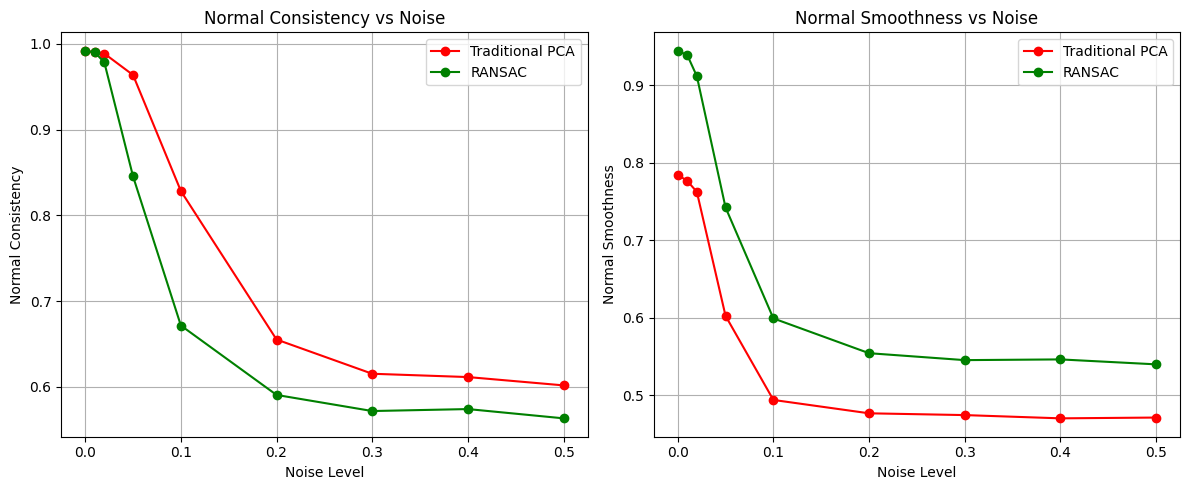

In [12]:
import numpy as np
import open3d as o3d
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt

def evaluate_normal_estimation(points, normals, method_name="Method"):
    tree = KDTree(points)
    k_neighbors = 30
    consistency_scores = []
    smoothness_scores = []
    for i in range(len(points)):
        distances, indices = tree.query(points[i:i+1], k=k_neighbors)
        neighbor_normals = normals[indices[0]]
        current_normal = normals[i]
        dot_products = np.abs(np.dot(neighbor_normals, current_normal))
        consistency = np.mean(dot_products)
        consistency_scores.append(consistency)
        normal_variations = np.std(neighbor_normals, axis=0)
        smoothness = 1.0 - np.mean(normal_variations)
        smoothness_scores.append(smoothness)
    
    return {
        'consistency': np.mean(consistency_scores),
        'consistency_std': np.std(consistency_scores),
        'smoothness': np.mean(smoothness_scores),
        'smoothness_std': np.std(smoothness_scores)
    }

def compare_methods_with_noise(points, noise_levels=[0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]):
    results = {}
    
    for noise_level in noise_levels:
        noisy_points = points + np.random.normal(0, noise_level, points.shape)
        pcd_traditional = o3d.geometry.PointCloud()
        pcd_traditional.points = o3d.utility.Vector3dVector(noisy_points)
        pcd_traditional.estimate_normals(
            search_param=o3d.geometry.KDTreeSearchParamKNN(knn=50)
        )
        traditional_normals = np.asarray(pcd_traditional.normals)
        ransac_normals = ransac_normal_estimation_parallel(noisy_points)
        traditional_metrics = evaluate_normal_estimation(noisy_points, traditional_normals, "Traditional")
        ransac_metrics = evaluate_normal_estimation(noisy_points, ransac_normals, "RANSAC")
        results[noise_level] = {
            'Traditional': traditional_metrics,
            'RANSAC': ransac_metrics
        }
    return results

def plot_comparison_results(results):
    noise_levels = list(results.keys())
    traditional_consistency = [results[n]['Traditional']['consistency'] for n in noise_levels]
    ransac_consistency = [results[n]['RANSAC']['consistency'] for n in noise_levels]
    traditional_smoothness = [results[n]['Traditional']['smoothness'] for n in noise_levels]
    ransac_smoothness = [results[n]['RANSAC']['smoothness'] for n in noise_levels]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    ax1.plot(noise_levels, traditional_consistency, 'r-o', label='Traditional PCA')
    ax1.plot(noise_levels, ransac_consistency, 'g-o', label='RANSAC')
    ax1.set_xlabel('Noise Level')
    ax1.set_ylabel('Normal Consistency')
    ax1.set_title('Normal Consistency vs Noise')
    ax1.legend()
    ax1.grid(True)
    ax2.plot(noise_levels, traditional_smoothness, 'r-o', label='Traditional PCA')
    ax2.plot(noise_levels, ransac_smoothness, 'g-o', label='RANSAC')
    ax2.set_xlabel('Noise Level')
    ax2.set_ylabel('Normal Smoothness')
    ax2.set_title('Normal Smoothness vs Noise')
    ax2.legend()
    ax2.grid(True)
    plt.tight_layout()
    plt.savefig('e:/project/3DV/PAs/PA1/result/normal_estimation_comparison.png')
    plt.show()
pcd = o3d.io.read_point_cloud("e:/project/3DV/PAs/PA1/saddle.ply")
points = np.asarray(pcd.points)

results = compare_methods_with_noise(points)

for noise_level, metrics in results.items():
    print(f"\nNoise level: {noise_level}")
    print("PCA without RANSAC:")
    print(f"    Consistancy: {metrics['Traditional']['consistency']:.4f} ± {metrics['Traditional']['consistency_std']:.4f}")
    print(f"    Smoothness: {metrics['Traditional']['smoothness']:.4f} ± {metrics['Traditional']['smoothness_std']:.4f}")
    print("RANSAC:")
    print(f"  Consistancy: {metrics['RANSAC']['consistency']:.4f} ± {metrics['RANSAC']['consistency_std']:.4f}")
    print(f"  Smoothness: {metrics['RANSAC']['smoothness']:.4f} ± {metrics['RANSAC']['smoothness_std']:.4f}")

plot_comparison_results(results)

We define normal vector consistency as the calculation of the average cosine of the angle between each point and its nearest neighbor's normal vectors, and normal vector smoothing as the calculation of the standard deviation of the local normal vector variation.
It can be seen that the agreements of both methods are higher in the case of no noise, but the agreement of RANSAC decreases more obviously with the growth of noise, and I think the reason may be because PCA is a global optimization method, which takes into account the contribution of all the nearest-neighbors points, while RANSAC is a sampling-based method, which uses only some points to estimate the normal vector each time, which may result in local discontinuities. However, on the smoothness curve, the results are in line with our expectations, i.e., RANSAC has better smoothness compared to PCA.


Noise level: 0
Traditional PCA:
    Mean Error: 10.72° ± 9.32°
    Median Error: 6.38°
    Max Error: 40.00°
RANSAC:
    Mean Error: 11.78° ± 9.67°
    Median Error: 8.85°
    Max Error: 60.94°

Noise level: 0.01
Traditional PCA:
    Mean Error: 10.84° ± 9.21°
    Median Error: 6.50°
    Max Error: 39.90°
RANSAC:
    Mean Error: 12.64° ± 10.31°
    Median Error: 9.61°
    Max Error: 58.95°

Noise level: 0.02
Traditional PCA:
    Mean Error: 11.14° ± 9.20°
    Median Error: 6.81°
    Max Error: 40.52°
RANSAC:
    Mean Error: 13.90° ± 10.64°
    Median Error: 11.36°
    Max Error: 65.45°

Noise level: 0.05
Traditional PCA:
    Mean Error: 12.33° ± 9.40°
    Median Error: 8.66°
    Max Error: 44.89°
RANSAC:
    Mean Error: 17.32° ± 13.01°
    Median Error: 13.95°
    Max Error: 84.80°

Noise level: 0.1
Traditional PCA:
    Mean Error: 17.53° ± 12.68°
    Median Error: 14.05°
    Max Error: 72.45°
RANSAC:
    Mean Error: 25.96° ± 18.40°
    Median Error: 21.61°
    Max Error: 89.59°

Nois

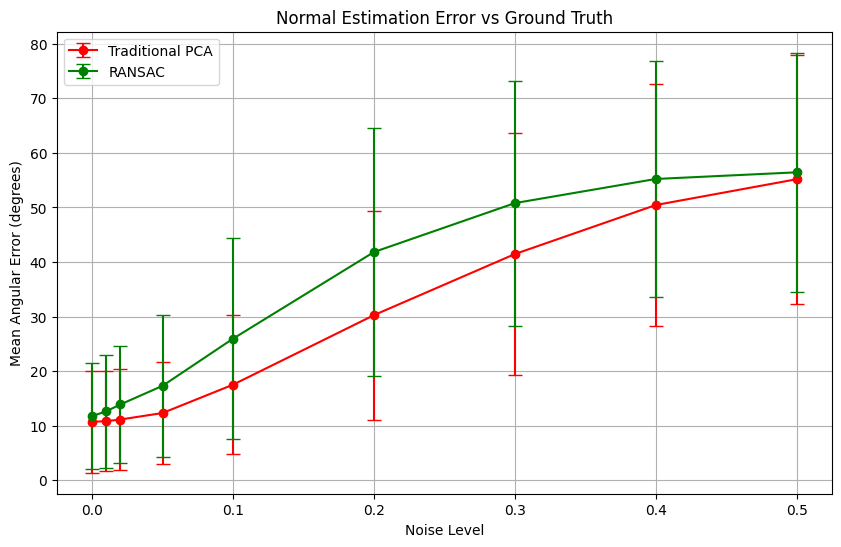

In [13]:
import trimesh
import numpy as np
import open3d as o3d
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt

def evaluate_normal_accuracy(estimated_normals, ground_truth_normals):
    dot_products = np.abs(np.sum(estimated_normals * ground_truth_normals, axis=1))
    dot_products = np.clip(dot_products, -1.0, 1.0)
    angles = np.arccos(dot_products)
    angles_deg = np.degrees(angles)
    
    return {
        'mean_error': np.mean(angles_deg),
        'std_error': np.std(angles_deg),
        'median_error': np.median(angles_deg),
        'max_error': np.max(angles_deg)
    }

def compare_with_ground_truth(noise_levels=[0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]):
    mesh = trimesh.load("e:/project/3DV/PAs/PA1/saddle.obj")
    gt_points = np.array(mesh.vertices)
    gt_normals = np.array(mesh.vertex_normals)
    
    results = {}
    for noise_level in noise_levels:
        noisy_points = gt_points + np.random.normal(0, noise_level, gt_points.shape)
        
        pcd_traditional = o3d.geometry.PointCloud()
        pcd_traditional.points = o3d.utility.Vector3dVector(noisy_points)
        pcd_traditional.estimate_normals(
            search_param=o3d.geometry.KDTreeSearchParamKNN(knn=50)
        )
        traditional_normals = np.asarray(pcd_traditional.normals)
        ransac_normals = ransac_normal_estimation_parallel(noisy_points)
        traditional_metrics = evaluate_normal_accuracy(traditional_normals, gt_normals)
        ransac_metrics = evaluate_normal_accuracy(ransac_normals, gt_normals)
        results[noise_level] = {
            'Traditional': traditional_metrics,
            'RANSAC': ransac_metrics
        }
    
    return results

def plot_ground_truth_comparison(results):
    noise_levels = list(results.keys())
    traditional_errors = [results[n]['Traditional']['mean_error'] for n in noise_levels]
    ransac_errors = [results[n]['RANSAC']['mean_error'] for n in noise_levels]
    
    traditional_stds = [results[n]['Traditional']['std_error'] for n in noise_levels]
    ransac_stds = [results[n]['RANSAC']['std_error'] for n in noise_levels]
    
    plt.figure(figsize=(10, 6))
    plt.errorbar(noise_levels, traditional_errors, yerr=traditional_stds, 
                fmt='r-o', label='Traditional PCA', capsize=5)
    plt.errorbar(noise_levels, ransac_errors, yerr=ransac_stds, 
                fmt='g-o', label='RANSAC', capsize=5)
    
    plt.xlabel('Noise Level')
    plt.ylabel('Mean Angular Error (degrees)')
    plt.title('Normal Estimation Error vs Ground Truth')
    plt.legend()
    plt.grid(True)
    
    plt.savefig('e:/project/3DV/PAs/PA1/result/normal_estimation_gt_comparison.png')
    plt.show()

results = compare_with_ground_truth()

for noise_level, metrics in results.items():
    print(f"\nNoise level: {noise_level}")
    print("Traditional PCA:")
    print(f"    Mean Error: {metrics['Traditional']['mean_error']:.2f}° ± {metrics['Traditional']['std_error']:.2f}°")
    print(f"    Median Error: {metrics['Traditional']['median_error']:.2f}°")
    print(f"    Max Error: {metrics['Traditional']['max_error']:.2f}°")
    print("RANSAC:")
    print(f"    Mean Error: {metrics['RANSAC']['mean_error']:.2f}° ± {metrics['RANSAC']['std_error']:.2f}°")
    print(f"    Median Error: {metrics['RANSAC']['median_error']:.2f}°")
    print(f"    Max Error: {metrics['RANSAC']['max_error']:.2f}°")

plot_ground_truth_comparison(results)

We use the vertex normal vectors of the mesh as the ground truth, compute the angular error between the estimated normal vectors and the ground truth, and plot the error rate as the noise increases. It is found that none of the RANSAC ever outperforms the PCA method, and in fact I still have a lot of questions about this result.

### Subproblem 2.4
Use Rusinkiewicz’s method to compute the principal curvatures for each face in icosphere.obj and sievert.obj.
- Step 1: Load pi, ni, and the face normal n
- Step 2: Select two orthogonal vectors ξu and ξv on the tangent plane of the face
- Step 3: Define Df = [ξu, ξv], design the optimization problem by Equation 1 and compute S by 
least-square
- Step 4: Compute the eigenvalues of S as the principal curvatures
$$
\begin{cases}
S D_f^T (p_2 - p_1) = D_f^T (\vec{n}_2 - \vec{n}_1) \\

S D_f^T (p_0 - p_2) = D_f^T (\vec{n}_0 - \vec{n}_2) \\

S D_f^T (p_1 - p_0) = D_f^T (\vec{n}_1 - \vec{n}_0)

\end{cases}
$$
### Solution
By examining the structure of the OBJ file: the sievert.obj file contains v and f, allowing us to apply the algorithm described above to compute the principal curvatures. However, the icosphere.obj file contains v, vt, vn, and f, meaning that the file provides both the tangents and normals for each face. To avoid using the pre-existing normal information, we will process the icosphere.obj file by removing the normal data and retaining only the vertex information.

In [14]:
import open3d as o3d
import numpy as np

mesh = o3d.io.read_triangle_mesh("icosphere.obj")

new_mesh = o3d.geometry.TriangleMesh()
new_mesh.vertices = mesh.vertices
new_mesh.triangles = mesh.triangles

new_mesh.vertex_normals = o3d.utility.Vector3dVector([])
new_mesh.triangle_normals = o3d.utility.Vector3dVector([])

o3d.io.write_triangle_mesh("icosphere_no_normal.obj", new_mesh, write_vertex_normals=False)

True

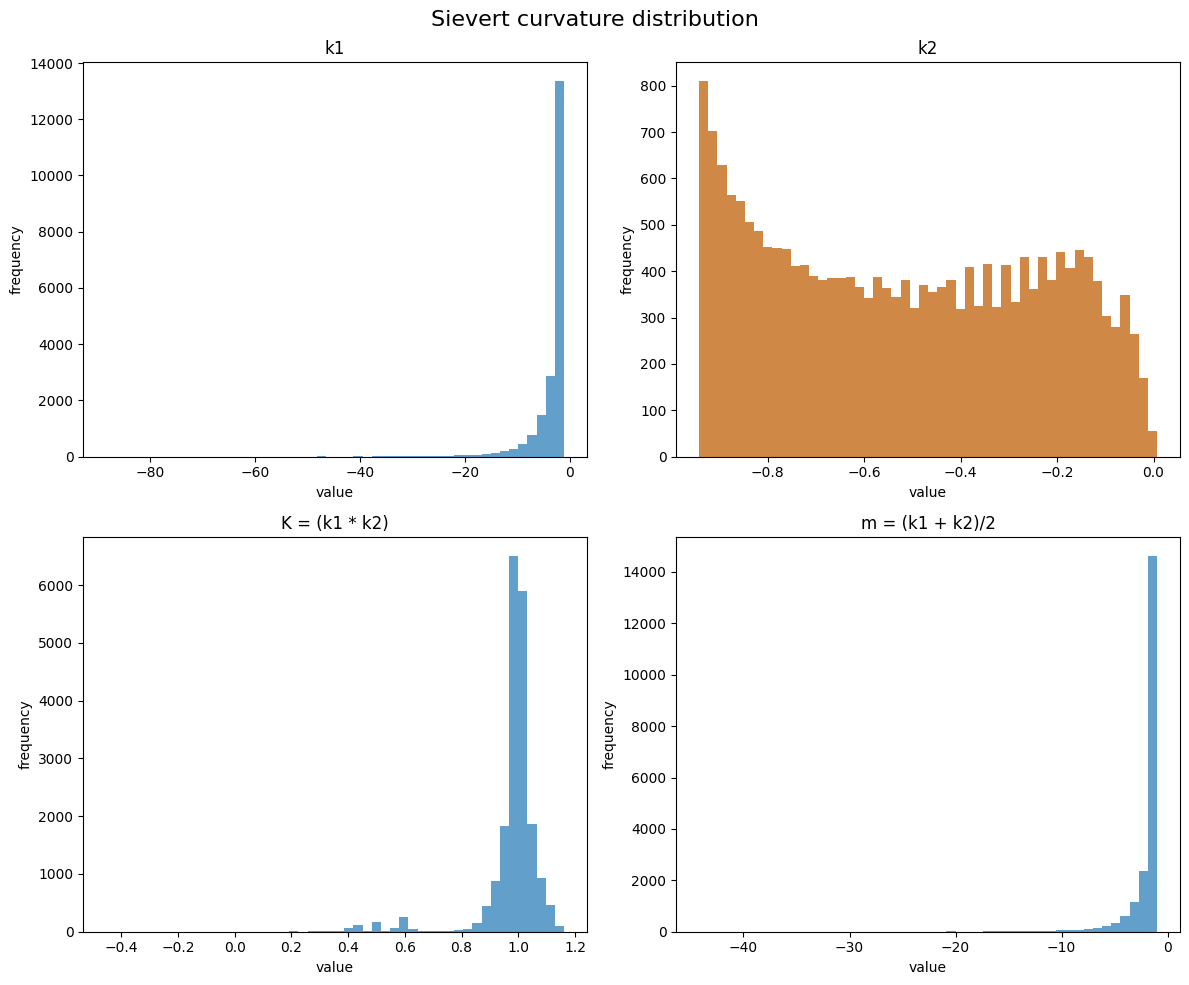

Sievert curvature distribution stats:
average k1= -3.3922, sigma = 4.5506
average k2= -0.5206, sigma = 0.2777
average Gauss Curvature= 0.9783, sigma = 0.1110
average mean Curvature= -1.9564, sigma = 2.1914


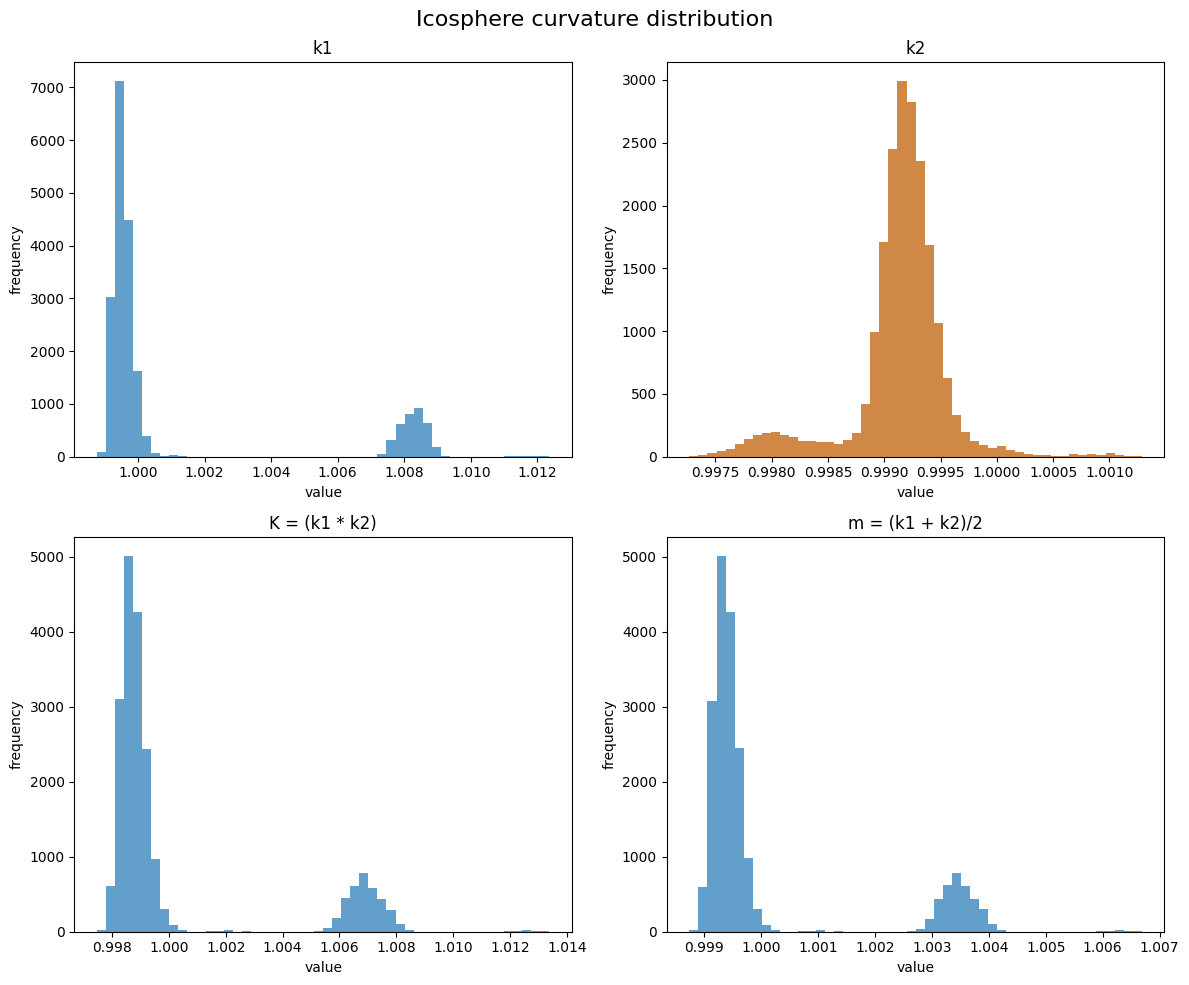

Icosphere curvature distribution stats:
average k1= 1.0011, sigma = 0.0034
average k2= 0.9991, sigma = 0.0004
average Gauss Curvature= 1.0002, sigma = 0.0032
average mean Curvature= 1.0001, sigma = 0.0016


In [15]:
import numpy as np
import trimesh
import matplotlib.pyplot as plt
from scipy.linalg import eigh
import os
def compute_principal_curvatures(mesh):
    
    vertices = mesh.vertices
    faces = mesh.faces
    vertex_normals = mesh.vertex_normals
    face_normals = mesh.face_normals
    face_curvatures = np.zeros((len(faces), 2))
    for i, face in enumerate(faces):
        p0, p1, p2 = vertices[face]
        n0, n1, n2 = vertex_normals[face]
        face_normal = face_normals[i]
        e0 = p1 - p0
        e1 = p2 - p1
        e2 = p0 - p2
        dn0 = n1 - n0
        dn1 = n2 - n1
        dn2 = n0 - n2
        xi_u = np.zeros(3)
        if abs(face_normal[0]) > abs(face_normal[1]):
            xi_u[1] = 1.0
        else:
            xi_u[0] = 1.0
        xi_u = xi_u - np.dot(xi_u, face_normal) * face_normal
        xi_u = xi_u / np.linalg.norm(xi_u)
        xi_v = np.cross(face_normal, xi_u)
        xi_v = xi_v / np.linalg.norm(xi_v)
        Df = np.column_stack((xi_u, xi_v))
        A = np.zeros((6, 4))
        b = np.zeros(6)
        edges = [(e0, dn0), (e1, dn1), (e2, dn2)]
        row = 0
        for edge, dn in edges:
            w = np.dot(Df.T, edge)
            A[row, 0] = w[0]
            A[row, 1] = w[1]
            A[row+1, 2] = w[0]
            A[row+1, 3] = w[1]
            b[row] = np.dot(xi_u, dn)
            b[row+1] = np.dot(xi_v, dn)
            row += 2
        x, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
        S = np.array([[x[0], x[2]], [x[1], x[3]]])
        S = (S + S.T) / 2
        eigenvalues, _ = eigh(S)
        k1, k2 = eigenvalues
        if abs(k1) < abs(k2):
            k1, k2 = k2, k1
        face_curvatures[i] = [k1, k2]
    
    return face_curvatures

def plot_curvature_histogram(curvatures, title, filename=None):
    k1 = curvatures[:, 0]
    k2 = curvatures[:, 1]
    gaussian = k1 * k2
    mean = (k1 + k2) / 2
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs[0, 0].hist(k1, bins=50, alpha=0.7)
    axs[0, 0].set_title('k1')
    axs[0, 0].set_xlabel('value')
    axs[0, 0].set_ylabel('frequency')

    axs[0, 1].hist(k2, bins=50, alpha=0.7)
    axs[0, 1].hist(k2, bins=50, alpha=0.7)
    axs[0, 1].set_title('k2')
    axs[0, 1].set_xlabel('value')
    axs[0, 1].set_ylabel('frequency')

    
    axs[1, 0].hist(gaussian, bins=50, alpha=0.7)
    axs[1, 0].set_title('K = (k1 * k2)')
    axs[1, 0].set_xlabel('value')
    axs[1, 0].set_ylabel('frequency')
    
    axs[1, 1].hist(mean, bins=50, alpha=0.7)
    axs[1, 1].set_title('m = (k1 + k2)/2')
    axs[1, 1].set_xlabel('value')
    axs[1, 1].set_ylabel('frequency')
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    
    if filename:
        plt.savefig(filename)
    
    plt.show()
    
    print(f"{title} stats:")
    print(f"average k1= {np.mean(k1):.4f}, sigma = {np.std(k1):.4f}")
    print(f"average k2= {np.mean(k2):.4f}, sigma = {np.std(k2):.4f}")
    print(f"average Gauss Curvature= {np.mean(gaussian):.4f}, sigma = {np.std(gaussian):.4f}")
    print(f"average mean Curvature= {np.mean(mean):.4f}, sigma = {np.std(mean):.4f}")

def main():
    sievert_path = "sievert.obj"
    icosphere_path = "icosphere_no_normal.obj"
    sievert = trimesh.load_mesh(sievert_path)
    icosphere = trimesh.load_mesh(icosphere_path)
    icosphere_curvatures = compute_principal_curvatures(icosphere)
    sievert_curvatures = compute_principal_curvatures(sievert)
    plot_curvature_histogram(sievert_curvatures, "Sievert curvature distribution", "sievert_curvatures.png")
    plot_curvature_histogram(icosphere_curvatures, "Icosphere curvature distribution", "icosphere_curvatures.png")
    gaussian_curvature = sievert_curvatures[:, 0] * sievert_curvatures[:, 1]
    mean_gaussian = np.mean(gaussian_curvature)
    std_gaussian = np.std(gaussian_curvature)
if __name__ == "__main__":
    main()

## Problem 3
Let $ p := (1+j)/\sqrt{2} $ and $ q := (1+k)/\sqrt{2} $ denote the unit-norm quaternions. Recall that the rotation $ M(p) $ is a 90-degree rotation about the $Y$ axis, while $ M(q) $ is a 90-degree rotation about the $Z$ axis. In the notes, we composed the two rotations $ M(p) $ and $ M(q) $. Here, we instead investigate the rotation that lies halfway between $ M(p) $ and $ M(q) $. The quaternion that lies halfway between $ p $ and $ q $ is simply
$$
\frac{p+q}{2} = \frac{1}{\sqrt{2}} + \frac{j}{2\sqrt{2}} + \frac{k}{2\sqrt{2}}
$$
### Subproblem 3.1
 Calculate the norm $ |(p+q)/2| $ of that quaternion, and note that it is not 1. Find a quaternion $ r $ that is a scalar multiple of $ (p+q)/2 $ and that has unit norm, $ |r| = 1 $, and calculate the rotation matrix $ M(r) $. Around what axis does $ M(r) $ rotate, and through what angle (say, to the nearest tenth of a degree)? 
### Solution
For a quaternion $q$,
$$
|q| = \sqrt{a^2 + b^2 + c^2 + d^2}
$$
Thus for $\frac{p+q}{2}$,
$$
|(p+q)/2| = \sqrt{1/2 + 1/8 + 1/8 } = \dfrac{\sqrt{3}}{2}\\
r = \dfrac{\sqrt{6}}{3} + \dfrac{\sqrt{6}j}{6} + \dfrac{\sqrt{6}k}{6}\\
$$
From the relationship the quaternion $R = w + x\vec{i} + y\vec{j} + z\vec{k}$, where  $w^2 + x^2 + y^2 + z^2 = 1$
$$
M(R) = 
\begin{bmatrix}
1 - 2y^2 - 2z^2 & 2xy - 2wz & 2xz + 2wy \\
2xy + 2wz & 1 - 2x^2 - 2z^2 & 2yz - 2wx \\ 
2xz - 2wy & 2yz + 2wx & 1 - 2x^2 - 2y^2
\end{bmatrix}
$$
Thus we get
$$
M(r) = 
\begin{bmatrix}
\dfrac{1}{3} & -\dfrac{2}{3} & \dfrac{2}{3} \\
\dfrac{2}{3} & \dfrac{2}{3} & \dfrac{1}{3} \\
-\dfrac{2}{3} & \dfrac{1}{3} & \dfrac{2}{3}
\end{bmatrix}
$$
And from the relationship of $M(R)$ and anxis-angle representation,
$$
\text{tr}(M) = 1 + 2\cos\theta\\
\theta  = \arccos(\dfrac{1}{2}(\text{tr}(M) - 1)) \\
$$
Thus 
$$
\theta = \arccos(\dfrac{1}{2}(\frac{5}{3} - 1)) = 70.5^\circ
$$
Axis:
$$
[0, \dfrac{\sqrt{2}}{2}, \dfrac{\sqrt{2}}{2}]
$$
### Subproblem 3.2
### Solution
By the relationship of quaternion and axis angle representation,
$$
q = \cos(\theta/) + sin(\theta/2)\vec{v}\\
p: [0, \dfrac{\pi}{2}, 0]\\
q: [0, 0, \dfrac{\pi}{2}]
$$
### Subproblem 3.3
Skew-symmetric representation of rotation: In this problem, we use $[\omega]$ to represent a skew-symmetric matrix constructed from $\omega \in \mathbb{R}^3$ as instructed in class
### Solution
#### (a)
>Build the skew-symmetric matrix $[\omega_p]$ of $p$ and $[\omega_q]$ of $q$, and derive their rotation matrices.

By vector $\omega = [\omega_1, \omega_2, \omega_3]$'s skew-symmetric matrix $\hat {\omega}$:
$$
[\omega] = \hat \omega =
\begin{bmatrix}
0 & -\omega_3 & \omega_2 \\
\omega_3 & 0 & -\omega_1 \\
-\omega_2 & \omega_1 & 0
\end{bmatrix}
$$
Thus we get
$$
[\omega_p] =
\begin{bmatrix}
0 & 0 & \frac{\pi}{2} \\
0 & 0 & 0 \\
-\frac{\pi}{2} & 0 & 0
\end{bmatrix}
$$
$$
[\omega_q] =
\begin{bmatrix}
0 & -\frac{\pi}{2} & 0 \\
\frac{\pi}{2} & 0 & 0 \\
0 & 0 & 0
\end{bmatrix}
$$
From Rodrigues' Lemma, we know that 
$$
\exp([\omega]) = I + \sin(\theta)\hat{n} + (1 - \cos(\theta)){\hat{n}}^2
$$
where $\hat w = \theta \hat n$,
Thus we get
$$
exp([\omega_p]) = M(p) = 
\begin{bmatrix}
0 & 0 & 1\\
0 & 1 & 0\\
-1 & 0 & 0
\end{bmatrix}
$$
$$
exp([\omega_q]) = M(q) =
\begin{bmatrix}
0 & -1 & 0\\
1 & 0 & 0\\
0 & 0 & 1
\end{bmatrix}
$$
#### (b) 
>Using what you have above to verify that the following $\exp([\omega_1] + [\omega_2]) = \exp([\omega_1]) \exp([\omega_2])$ relationship does not hold for exponential map in general(Note: The condition for this equation to hold is $[\omega_1][\omega_2] = [\omega_2][\omega_1]$). Therefore, composing rotations in skew-symmetric representation should not be done in this way.
$$
[\omega_p] + [\omega_q] =
\begin{bmatrix}
0 & -\frac{\pi}{2} & \frac{\pi}{2} \\
\frac{\pi}{2} & 0 & 0 \\
-\frac{\pi}{2} & 0 & 0
\end{bmatrix}
$$
From 
$$
[\omega] = 
\begin{bmatrix}
0 & -\omega_3 & \omega_2 \\
\omega_3 & 0 & -\omega_1 \\
-\omega_2 & \omega_1 & 0
\end{bmatrix}
$$
we know that
$$
\omega_1 = 0,\omega_2 = \frac{\pi}{2},\omega_3 = \frac{\pi}{2}\\
\omega = [0, \frac{\pi}{2}, \frac{\pi}{2}] = \frac{\sqrt{2}\pi}{2} [0, \frac{\sqrt{2}}{2}, \frac{\sqrt{2}}{2}]\\
\vec{n} = \frac{\omega}{\theta} = [0, \frac{\sqrt{2}}{2}, \frac{\sqrt{2}}{2}]\\
\theta = \frac{\sqrt{2}\pi}{2}\\
\hat{n} = [n] = 
\begin{bmatrix}
0 & -\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \\
\frac{\sqrt{2}}{2} & 0 & 0\\
-\frac{\sqrt{2}}{2} & 0 & 0
\end{bmatrix}
$$
Thus from Rodrigues' Lemma, we get
$$
exp([\omega]) = I + \sin(\theta)\hat{n} + (1 - \cos(\theta)){\hat{n}}^2\\
exp([\omega_p]+ [\omega_q])
= I + \sin(\frac{\sqrt{2}\pi}{2})\hat{n} + (1 - \cos(\frac{\sqrt{2}\pi}{2})){\hat{n}}^2\\
= 
\begin{bmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 1
\end{bmatrix}
+
sin(\frac{\sqrt{2}\pi}{2})
\begin{bmatrix}
0 & -\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} \\
\frac{\sqrt{2}}{2} & 0 & 0\\
-\frac{\sqrt{2}}{2} & 0 & 0
\end{bmatrix}
+
(1 - \cos(\frac{\sqrt{2}\pi}{2}))
\begin{bmatrix}
-1 & 0 & 0\\
0 & -\frac{1}{2} & \frac{1}{2}\\
0 & \frac{1}{2} & -\frac{1}{2}
\end{bmatrix}\\
$$
$$
\exp([\omega_p] + [\omega_q]) = \begin{bmatrix}
\cos\left(\frac{\pi}{\sqrt{2}}\right) & -\frac{\sin\left(\frac{\pi}{\sqrt{2}}\right)}{\sqrt{2}} & \frac{\sin\left(\frac{\pi}{\sqrt{2}}\right)}{\sqrt{2}} \\
\frac{\sin\left(\frac{\pi}{\sqrt{2}}\right)}{\sqrt{2}} & \frac{1+\cos\left(\frac{\pi}{\sqrt{2}}\right)}{2} & \frac{1-\cos\left(\frac{\pi}{\sqrt{2}}\right)}{2} \\
-\frac{\sin\left(\frac{\pi}{\sqrt{2}}\right)}{\sqrt{2}} & \frac{1-\cos\left(\frac{\pi}{\sqrt{2}}\right)}{2} & \frac{1+\cos\left(\frac{\pi}{\sqrt{2}}\right)}{2}
\end{bmatrix}=

\begin{bmatrix}
-0.60569987 & -0.56264006 & 0.56264006\\
0.56264006 & 0.19715007 & 0.80284993\\
-0.56264006 & 0.80284993 & 0.19715007
\end{bmatrix}
$$
However,
$$
exp([\omega_p])exp([\omega_q]) =
\begin{bmatrix}
0 & -1 & 0\\
1 & 0 & 0\\
0 & 1 & 0
\end{bmatrix}
$$
Therefore, we verified that composing rotations in skew-symmetric representation should not be done in this way.

### Subproblem 3.4
**Double-covering of quaternion:** What are the exponential coordinates of $p' = -p$ and $q' = -q$? What do you observe by comparing the exponential coordinates of $(p, -p)$ and $(q, -q)$? Does this relation hold for any quaternion pair $(r, -r)$? If it does, write down the statement and prove it.
### Solution
For $p'$ and $q'$,
$$
p' = [0, -\frac{\pi}{2}, 0]\\
q' = [0, 0, -\frac{\pi}{2}]\\
$$
Actually the exponential coordinates of $(p, -p)$ represents the same rotation, the same as the exponential coordinates of $(q, -q)$ and any  quaternion pair $(r, -r)$.
##### Proof of any  quaternion pair $(r, -r)$ represents the same rotation
Assume $r = (w, x, y, z) = \cos\frac{\theta}{2} + \mathbf{u}\sin\frac{\theta}{2} $
$$
-r = -\cos\frac{\theta}{2} - \mathbf{u}\sin\frac{\theta}{2} = \cos(\pi - \frac{\theta}{2}) + (-\mathbf{u})\sin(\pi - \frac{\theta}{2}) = \cos(\frac{2\pi - \theta}{2}) + (-\mathbf{u})\sin(\frac{2\pi - \theta}{2})
$$
That represents rotaing around $- \mathbf{u}$ is $2 \pi - \theta $, it is the same as rotating around u for angle $\theta$.




## Problem 4
Given a mesh such as a Stanford Bunny, use spheres to approximate the given mesh. The objective is maximizing the volume covered while ensuring the total number of spheres does not exceed a predefined number N . Please locate the meshes to be used for this assignment in the folder objs approx. You are free to choose the sphere radius and the maximum number of spheres N ; however, you should provide clear and well-reasoned justifications for the values you choose. For each mesh, we expect you to create multiple problem settings with different N and sphere radius. Subsequently, solve theproblem under these different configurations and perform a thorough analysis of both efficiency and quality.

### Subproblem 4.1
Mesh Volume Estimation. Estimate the volume of a 3D mesh (e.g., Stanford Bunny)
>Hint: Use Python packages such as trimesh and PyVista for SDF computing and sampling. In addition to simply implementing these methods, conduct some comparisons between these two methods and compare computational trade-offs.
### Solution
#### (a) Using Voxelization
Estimate the volume by converting the mesh into a voxel. Please vary the resolution and perform comparisons and analysis regarding the efficiency and the accuracy.



True Volume: 0.0008529406012024281

Volume estimation results under different resolutions:
Resolution | Volume | Error(%) | Time(s) | Memory(MB)
---------------------------------------------


Processing Bunny:   0%|          | 0/6 [00:00<?, ?it/s]

Processing Bunny:  17%|█▋        | 1/6 [00:36<03:04, 36.94s/it]

    8      | 0.00205002 |  140.35  |  0.470  |   30.18   


Processing Bunny:  33%|███▎      | 2/6 [01:10<02:20, 35.14s/it]

    16     | 0.00137053 |  60.68   |  0.422  |   29.68   


Processing Bunny:  50%|█████     | 3/6 [01:45<01:44, 34.78s/it]

    32     | 0.00108001 |  26.62   |  0.379  |   28.36   


Processing Bunny:  67%|██████▋   | 4/6 [02:19<01:08, 34.45s/it]

    64     | 0.00095955 |  12.50   |  0.763  |   34.86   


Processing Bunny:  83%|████████▎ | 5/6 [02:54<00:34, 34.84s/it]

   128     | 0.00090557 |   6.17   |  2.606  |   64.29   


Processing Bunny: 100%|██████████| 6/6 [03:41<00:00, 36.92s/it]

   256     | 0.00087886 |   3.04   | 13.221  |   551.75  


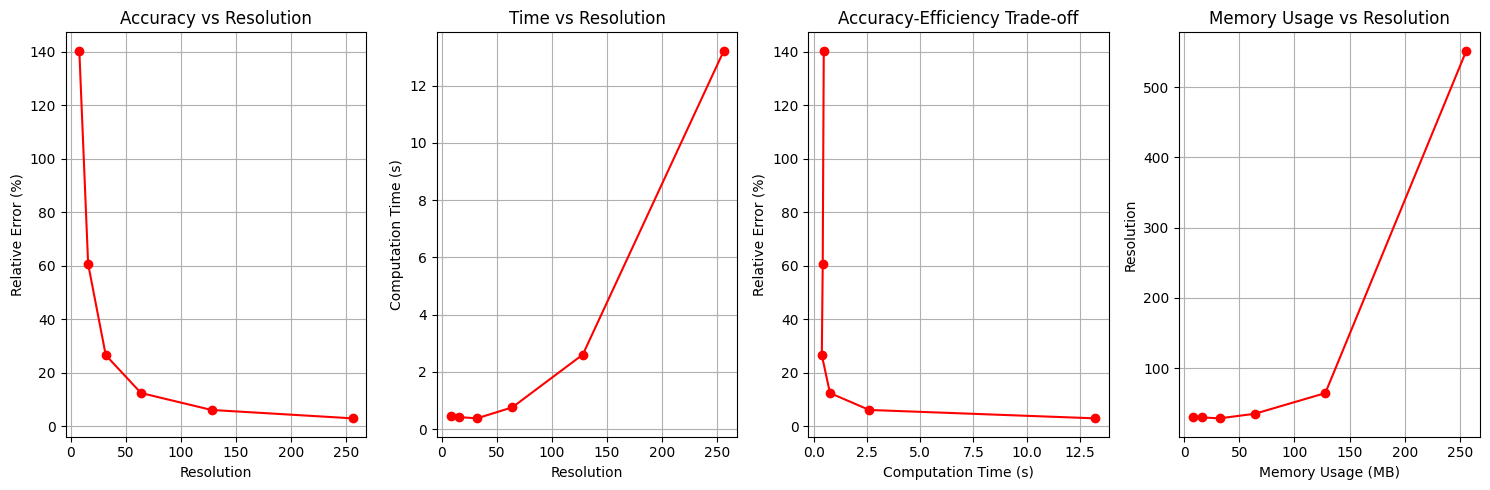


Best resolution: 256, Relative error: 3.04%


In [ ]:
import open3d as o3d
import numpy as np
import time
import matplotlib.pyplot as plt
from tqdm import tqdm
import trimesh

def get_memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / 1024 / 1024 


def estimate_volume_voxel(mesh_path, resolution):
    initial_memory = get_memory_usage()
    mesh = o3d.io.read_triangle_mesh(mesh_path)
    mesh.compute_vertex_normals()
    is_watertight = mesh.is_watertight()
    if not is_watertight:
        print("Warning: Mesh is not watertight, which may affect volume calculation accuracy")
    start_time = time.time()
    bbox = mesh.get_axis_aligned_bounding_box()
    bbox_size = bbox.get_max_bound() - bbox.get_min_bound()
    voxel_size = max(bbox_size) / resolution
    volume = bbox.volume()
    tri_mesh = trimesh.load(mesh_path)
    tri_mesh.fill_holes()
    tri_mesh.fix_normals()
    voxels = tri_mesh.voxelized(pitch=voxel_size).fill()
    points = voxels.points
    voxel_grid = o3d.geometry.VoxelGrid.create_from_point_cloud(
        o3d.geometry.PointCloud(points=o3d.utility.Vector3dVector(points)),
        voxel_size=voxel_size
    )
    volume = voxels.volume
    time_cost = time.time() - start_time
    memory_used = get_memory_usage() - initial_memory
    
    return volume, time_cost, voxel_grid, memory_used

def compute_true_volume(mesh_path):
    trimesh_mesh = trimesh.load(mesh_path)
    trimesh_mesh.fill_holes()
    trimesh_mesh.fix_normals()
    true_volume = trimesh_mesh.volume
    o3d_mesh = o3d.io.read_triangle_mesh(mesh_path)
    o3d_mesh.compute_vertex_normals()
    return true_volume, o3d_mesh

def main():
    bunny_path = "e:/project/3DV/PAs/PA1/objs_approx/bunny.obj"
    resolutions = [8, 16, 32, 64, 128, 256]
    true_volume, original_mesh = compute_true_volume(bunny_path)
    print(f"True Volume: {true_volume}")
    volumes = []
    times = []
    voxel_grids = []
    relative_errors = []
    memory_usages = []
    print("\nVolume estimation results under different resolutions:")
    print("Resolution | Volume | Error(%) | Time(s) | Memory(MB)")
    print("-" * 45)
    
    for res in tqdm(resolutions, desc="Processing Bunny"):
        vol, t, voxel_grid, mem = estimate_volume_voxel(bunny_path, res)
        volumes.append(vol)
        times.append(t)
        voxel_grids.append(voxel_grid)
        memory_usages.append(mem)
        rel_error = abs(vol - true_volume) / true_volume * 100
        relative_errors.append(rel_error)
        print(f"{res:^10d} | {vol:^10.8f} | {rel_error:^8.2f} | {t:^7.3f} | {mem:^10.2f}")
    
    fig, axes = plt.subplots(1, 4, figsize=(15, 5))
    axes[0].plot(resolutions, relative_errors, 'ro-')
    axes[0].set_xlabel('Resolution')
    axes[0].set_ylabel('Relative Error (%)')
    axes[0].set_title('Accuracy vs Resolution')
    axes[0].grid(True)
    
    axes[1].plot(resolutions, times, 'ro-')
    axes[1].set_xlabel('Resolution')
    axes[1].set_ylabel('Computation Time (s)')
    axes[1].set_title('Time vs Resolution')
    axes[1].grid(True)
    
    axes[2].plot(times, relative_errors, 'ro-')
    axes[2].set_xlabel('Computation Time (s)')
    axes[2].set_ylabel('Relative Error (%)')
    axes[2].set_title('Accuracy-Efficiency Trade-off')
    axes[2].grid(True)
    
    axes[3].plot(resolutions,memory_usages , 'ro-')
    axes[3].set_xlabel('Resolution')
    axes[3].set_ylabel('Memory Usage (MB)')
    axes[3].set_title('Memory Usage vs Resolution')
    axes[3].grid(True)
    
    
    
    plt.tight_layout()
    plt.savefig("e:/project/3DV/PAs/PA1/volume_analysis.png")
    plt.show()
    best_res_idx = np.argmin(relative_errors)
    best_res = resolutions[best_res_idx]
    best_voxel_grid = voxel_grids[best_res_idx]
    
    print(f"\nBest resolution: {best_res}, Relative error: {relative_errors[best_res_idx]:.2f}%")
    vis = o3d.visualization.Visualizer()
    vis.create_window(window_name="Voxelization Result")
    original_mesh.paint_uniform_color([0.8, 0.8, 0.8])
    original_mesh.compute_vertex_normals()
    vis.add_geometry(original_mesh)
    vis.add_geometry(best_voxel_grid)
    opt = vis.get_render_option()
    opt.background_color = np.array([0.1, 0.1, 0.1])
    opt.mesh_show_wireframe = True
    opt.mesh_show_back_face = True
    vis.run()
    vis.destroy_window()

if __name__ == "__main__":
    main()

![bunny](assets/bunny.png)

As resolution increases, accuracy improves at the cost of computational efficiency. Resolution 128 offers an optimal balance between accuracy and computation time, achieving reasonable precision while maintaining practical processing speed. Higher resolutions, while more accurate, show diminishing returns relative to their computational cost.

#### (b) Signed Distance Field (SDF) + Monte Carlo
- Compute the SDF of the mesh.
- Randomly sample points in the mesh’s bounding box.
- Use the SDF to classify points as inside/outside.
- Volume ≈ (Fraction of inside points) × (Bounding box volume)

True Volume: 0.0008529406012024281

Running multiple experiments...


Experiments: 100%|██████████| 10/10 [13:21<00:00, 80.13s/it]



Average results over 10 experiments:
Samples | Volume±Std | Error(%)±Std | Time(s)±Std | Memory(MB)±Std
----------------------------------------------------------------------
  100    | 0.00083022±0.00015895 | 14.01±12.57 | 0.063±0.021 | -7.20±1.22
  1000   | 0.00084702±0.00003002 | 2.50±2.57 | 0.120±0.019 | 3.89±0.16
  5000   | 0.00084508±0.00001657 | 1.54±1.50 | 0.399±0.091 | 3.86±0.06
 10000   | 0.00084479±0.00001241 | 1.27±1.19 | 0.723±0.162 | 3.90±0.20
 50000   | 0.00085582±0.00000426 | 0.54±0.27 | 3.186±0.369 | 6.17±0.12
 100000  | 0.00085172±0.00000317 | 0.30±0.26 | 6.278±0.560 | 7.35±0.23
 500000  | 0.00085293±0.00000280 | 0.28±0.17 | 68.962±110.494 | 35.74±0.29


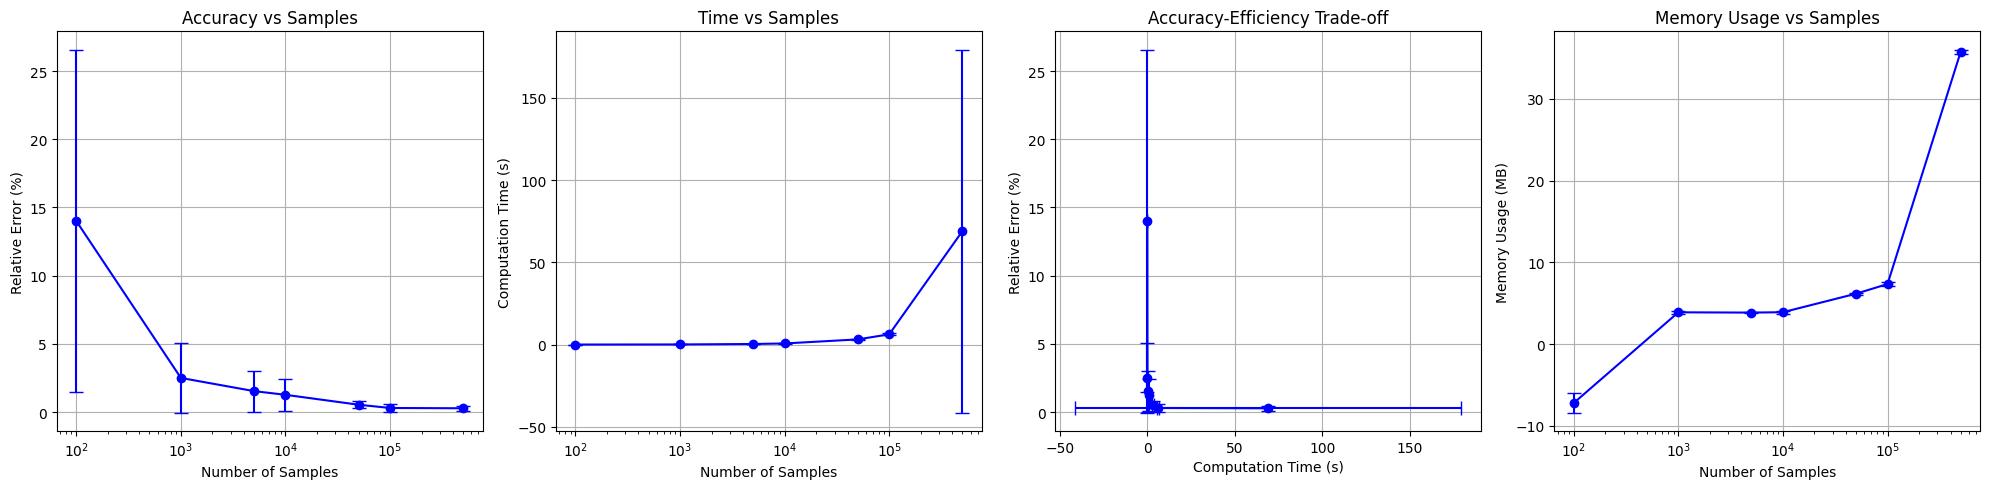

In [21]:
import open3d as o3d
import numpy as np
import time
import matplotlib.pyplot as plt
from tqdm import tqdm
import trimesh
import pyvista as pv
import psutil
import os

def estimate_volume_sdf(mesh_path, num_samples):
    initial_memory = get_memory_usage()
    mesh = pv.read(mesh_path)
    start_time = time.time()
    bounds = mesh.bounds
    bbox_min = np.array([bounds[0], bounds[2], bounds[4]])
    bbox_max = np.array([bounds[1], bounds[3], bounds[5]])
    bbox_size = bbox_max - bbox_min
    bbox_volume = np.prod(bbox_size)
    points = np.random.uniform(
        bbox_min, 
        bbox_max, 
        size=(num_samples, 3)
    )
    point_cloud = pv.PolyData(points)
    point_cloud = point_cloud.compute_implicit_distance(mesh)
    signed_distance = point_cloud.get_array('implicit_distance')  
    points_inside = np.sum(signed_distance < 0)
    volume = (points_inside / num_samples) * bbox_volume
    time_cost = time.time() - start_time
    memory_used = get_memory_usage() - initial_memory
    
    return volume, time_cost, memory_used

def main():
    bunny_path = "objs_approx/bunny.obj"
    tri_mesh = trimesh.load(bunny_path)
    tri_mesh.fix_normals()
    true_volume = tri_mesh.volume
    print(f"True Volume: {true_volume}")
    
    sample_sizes = [100, 1000, 5000, 10000, 50000, 100000, 500000]
    n_experiments = 10
    
    # 存储多次实验的结果
    all_volumes = []
    all_times = []
    all_memories = []
    all_errors = []
    
    print("\nRunning multiple experiments...")
    for _ in tqdm(range(n_experiments), desc="Experiments"):
        volumes = []
        times = []
        memories = []
        errors = []
        
        for samples in sample_sizes:
            vol, t, mem = estimate_volume_sdf(bunny_path, samples)
            volumes.append(vol)
            times.append(t)
            memories.append(mem)
            rel_error = abs(vol - true_volume) / true_volume * 100
            errors.append(rel_error)
            
        all_volumes.append(volumes)
        all_times.append(times)
        all_memories.append(memories)
        all_errors.append(errors)
    
    # 计算平均值和标准差
    mean_volumes = np.mean(all_volumes, axis=0)
    std_volumes = np.std(all_volumes, axis=0)
    mean_times = np.mean(all_times, axis=0)
    std_times = np.std(all_times, axis=0)
    mean_memories = np.mean(all_memories, axis=0)
    std_memories = np.std(all_memories, axis=0)
    mean_errors = np.mean(all_errors, axis=0)
    std_errors = np.std(all_errors, axis=0)
    
    print("\nAverage results over", n_experiments, "experiments:")
    print("Samples | Volume±Std | Error(%)±Std | Time(s)±Std | Memory(MB)±Std")
    print("-" * 70)
    
    for i, samples in enumerate(sample_sizes):
        print(f"{samples:^8d} | {mean_volumes[i]:^.8f}±{std_volumes[i]:.8f} | "
              f"{mean_errors[i]:^.2f}±{std_errors[i]:.2f} | "
              f"{mean_times[i]:^.3f}±{std_times[i]:.3f} | "
              f"{mean_memories[i]:^.2f}±{std_memories[i]:.2f}")
    
    # 创建带误差棒的图表
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    axes[0].errorbar(sample_sizes, mean_errors, yerr=std_errors, fmt='bo-', capsize=5)
    axes[0].set_xlabel('Number of Samples')
    axes[0].set_ylabel('Relative Error (%)')
    axes[0].set_title('Accuracy vs Samples')
    axes[0].set_xscale('log')
    axes[0].grid(True)
    
    axes[1].errorbar(sample_sizes, mean_times, yerr=std_times, fmt='bo-', capsize=5)
    axes[1].set_xlabel('Number of Samples')
    axes[1].set_ylabel('Computation Time (s)')
    axes[1].set_title('Time vs Samples')
    axes[1].set_xscale('log')
    axes[1].grid(True)
    
    axes[2].errorbar(mean_times, mean_errors, xerr=std_times, yerr=std_errors, fmt='bo-', capsize=5)
    axes[2].set_xlabel('Computation Time (s)')
    axes[2].set_ylabel('Relative Error (%)')
    axes[2].set_title('Accuracy-Efficiency Trade-off')
    axes[2].grid(True)
    
    axes[3].errorbar(sample_sizes, mean_memories, yerr=std_memories, fmt='bo-', capsize=5)
    axes[3].set_xlabel('Number of Samples')
    axes[3].set_ylabel('Memory Usage (MB)')
    axes[3].set_title('Memory Usage vs Samples')
    axes[3].set_xscale('log')
    axes[3].grid(True)
    
    plt.tight_layout()
    plt.savefig("e:/project/3DV/PAs/PA1/sdf_analysis_with_error_bars.png")
    plt.show()

if __name__ == "__main__":
    main()

#### Subproblem1 Lab-Report
分别比较两种方法的准确性、速度和内存使用的报告

Voxel:
![](voxel_output.png)

SDF+MC:
某一次的实验结果：
![](sdf_output.png)

重复实验10次，带有误差棒的结果：
![](sdf_outputs.png)




### SubProblem 4.2 
Mesh Intersection Volume Estimation
Compute the intersection volume between two meshes (e.g., an apple and the Stanford Bunny). Develop test cases for this subproblem using the meshes provided in the `objs.approx` directory. For example, place an apple and a bunny in the same global coordinate system and vary their poses to create intersecting configurations. Your test cases should cover a range of intersection ratios, from no intersection (0) to near the maximum possible intersection ratio. For each mesh pair, create at least five test cases with intersection ratios spanning this range. Note that determining the exact maximum possible intersection ratio is not required for this assignment; simply attempting to maximize overlap is sufficient. Ensure your submitted package includes the generated test cases and that your report provides corresponding visualizations for each case.

Please implement the following two estimation methods:

- **Voxelization.**
  1. Voxelize both meshes.
  2. Compute the overlapping voxels.
  3. Intersection volume = (Number of overlapping voxels) × (Voxel size)^3.

- **Monte Carlo Sampling.**
  1. Sample points in the bounding box of the overlapping region.
  2. Check if points lie inside both meshes (e.g., using SDFs).
  3. Intersection volume ≈ (Fraction of overlapping points) × (Bounding box volume).